[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/drive/1m8G_PLIRIUjUca-BUi6v0vqCZpNKYTHG#scrollTo=Xxfgfk8o3wTb)


# 1. Reddit Data Analysis

# 2. Problem Description <a id="1"></a>

Using Reddit Dataset, do Exploratory Data Analysis and Visualize to WordCloud.

# 3. Environment Setting<a id="3"></a>

## 3.1. Import Library<a id="3.1"></a>

In [ ]:
# Image
from PIL import Image

# Python Collectino
from collections import Counter

# FOR Loop Verbose
from tqdm import tqdm

# System
import os

# String
import string

# Natural Language Processing
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk.stem import WordNetLemmatizer

# Date and Time
import datetime

# Dataframe
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Numerical Data
import numpy as np

# Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.manifold import TSNE
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
!wget https://gist.githubusercontent.com/milhaud1201/6ecc7f702e7170bba0237cf867aeccaa/raw/c41f5d5399aae564ea6d85cd95ad7d82a29888cc/reddit_r_Korean.csv -O dict.csv

--2024-03-24 05:03:28--  https://gist.githubusercontent.com/milhaud1201/6ecc7f702e7170bba0237cf867aeccaa/raw/c41f5d5399aae564ea6d85cd95ad7d82a29888cc/reddit_r_Korean.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116443 (114K) [text/plain]
Saving to: ‘dict.csv’

dict.csv            100%[===================>] 113.71K  --.-KB/s    in 0.02s   

2024-03-24 05:03:28 (4.99 MB/s) - ‘dict.csv’ saved [116443/116443]



In [ ]:
data_path = 'dict.csv'
print(data_path)
if not os.path.exists(data_path):
    nltk.download()
nltk.data.path.append(data_path)

dict.csv


In [ ]:
pd.options.display.max_rows = 499
pd.options.display.max_columns = 499
pd.options.mode.chained_assignment = None

In [ ]:
%matplotlib inline

## 3.2. Load Dataset<a id="3.2"></a>

In [ ]:
raw = pd.read_csv('dict.csv', encoding='utf-8')
raw

id                                              title  score  \
0    1bd3u8o  Bi-Weekly /r/Korean Free Talk - Entertainment ...      6   
1     hw4gy0            The Ultimate Beginner's Resource Thread   3759   
2    1bktz4t  Is it normal for a 할머니 to refer to a baby as 새끼?      41   
3    1bkzr78  죽이다 means "to kill". Would 죽인 남자 mean "a kille...      7   
4    1bkxbch  Can anyone help me understand this sentence fr...      5   
..       ...                                                ...    ...   
651  1aixbua  Need help understanding G 2.1 of Integrated Ko...      1   
652  1aiv5xv                   Journal Writing Translation Help      1   
653  1aipj5y                                  올해 Pronunciation?      2   
654  1aiua9l  I need help with my conjugation chart test hel...      1   
655  1aillgu  What should I study after taking the TOPIK 2 e...      2   

     upvote_ratio               author  author_flair_text  \
0            0.88        AutoModerator                NaN   
1            1.00              Pikmeir                NaN   
2            0.94     AwesomePerson453                NaN   
3            0.90          Tight_Zone_                NaN   
4            0.86  Constant_Dream_9218                NaN   
..            ...                  ...                ...   
651          1.00     Sometimes_ireply                NaN   
652          0.67              luhtiaa                NaN   
653          1.00           Stan_Ateez                NaN   
654          1.00          Baeksonghwa                NaN   
655          0.63   Main_Cockroach4889                NaN   

                                             permalink   created_utc  \
0    /r/Korean/comments/1bd3u8o/biweekly_rkorean_fr...  1.710266e+09   
1    /r/Korean/comments/hw4gy0/the_ultimate_beginne...  1.595460e+09   
2    /r/Korean/comments/1bktz4t/is_it_normal_for_a_...  1.711094e+09   
3    /r/Korean/comments/1bkzr78/죽이다_means_to_kill_w...  1.711116e+09   
4    /r/Korean/comments/1bkxbch/can_anyone_help_me_...  1.711108e+09   
..                                                 ...           ...   
651  /r/Korean/comments/1aixbua/need_help_understan...  1.707078e+09   
652  /r/Korean/comments/1aiv5xv/journal_writing_tra...  1.707073e+09   
653       /r/Korean/comments/1aipj5y/올해_pronunciation/  1.707058e+09   
654  /r/Korean/comments/1aiua9l/i_need_help_with_my...  1.707070e+09   
655  /r/Korean/comments/1aillgu/what_should_i_study...  1.707045e+09   

     num_comments  over_18  
0              34    False  
1               0    False  
2              14    False  
3               4    False  
4              11    False  
..            ...      ...  
651             3    False  
652             4    False  
653             1    False  
654             2    False  
655            10    False  

[656 rows x 10 columns]

In [ ]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 656 entries, 0 to 655
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 656 non-null    object 
 1   title              656 non-null    object 
 2   score              656 non-null    int64  
 3   upvote_ratio       656 non-null    float64
 4   author             653 non-null    object 
 5   author_flair_text  0 non-null      float64
 6   permalink          656 non-null    object 
 7   created_utc        656 non-null    float64
 8   num_comments       656 non-null    int64  
 9   over_18            656 non-null    bool   
dtypes: bool(1), float64(3), int64(2), object(4)
memory usage: 46.9+ KB


In [ ]:
raw.describe(include='all')

id                                              title  \
count       656                                                656   
unique      656                                                654   
top     1bd3u8o  Bi-Weekly /r/Korean Free Talk - Entertainment ...   
freq          1                                                  3   
mean        NaN                                                NaN   
std         NaN                                                NaN   
min         NaN                                                NaN   
25%         NaN                                                NaN   
50%         NaN                                                NaN   
75%         NaN                                                NaN   
max         NaN                                                NaN   

              score  upvote_ratio         author  author_flair_text  \
count    656.000000     656.00000            653                0.0   
unique          NaN           NaN            500                NaN   
top             NaN           NaN  niemandasked4                NaN   
freq            NaN           NaN             31                NaN   
mean      16.474085       0.79250            NaN                NaN   
std      149.285625       0.22945            NaN                NaN   
min        0.000000       0.06000            NaN                NaN   
25%        1.000000       0.67000            NaN                NaN   
50%        3.000000       0.87500            NaN                NaN   
75%       10.000000       1.00000            NaN                NaN   
max     3759.000000       1.00000            NaN                NaN   

                                                permalink   created_utc  \
count                                                 656  6.560000e+02   
unique                                                656           NaN   
top     /r/Korean/comments/1bd3u8o/biweekly_rkorean_fr...           NaN   
freq                                                    1           NaN   
mean                                                  NaN  1.708925e+09   
std                                                   NaN  4.594413e+06   
min                                                   NaN  1.595460e+09   
25%                                                   NaN  1.708066e+09   
50%                                                   NaN  1.709089e+09   
75%                                                   NaN  1.710113e+09   
max                                                   NaN  1.711126e+09   

        num_comments over_18  
count     656.000000     656  
unique           NaN       2  
top              NaN   False  
freq             NaN     650  
mean        9.150915     NaN  
std        11.927136     NaN  
min         0.000000     NaN  
25%         3.000000     NaN  
50%         6.000000     NaN  
75%        11.000000     NaN  
max       100.000000     NaN

In [ ]:
raw.isna().sum()

id                     0
title                  0
score                  0
upvote_ratio           0
author                 3
author_flair_text    656
permalink              0
created_utc            0
num_comments           0
over_18                0
dtype: int64

# 4. Data Preprocessing<a id="4"></a>

## 4.1. Missing Value<a id="4.1"></a>

In [ ]:
cleaned = raw.copy()

In [ ]:
cleaned.title = cleaned.title.fillna('null')

In [ ]:
cleaned[cleaned.title == 'null']

Empty DataFrame
Columns: [id, title, score, upvote_ratio, author, author_flair_text, permalink, created_utc, num_comments, over_18]
Index: []

**author_flair_text**<br>
drop

In [ ]:
columns = ['author_flair_text']
cleaned = cleaned.drop(columns, axis=1)
cleaned

id                                              title  score  \
0    1bd3u8o  Bi-Weekly /r/Korean Free Talk - Entertainment ...      6   
1     hw4gy0            The Ultimate Beginner's Resource Thread   3759   
2    1bktz4t  Is it normal for a 할머니 to refer to a baby as 새끼?      41   
3    1bkzr78  죽이다 means "to kill". Would 죽인 남자 mean "a kille...      7   
4    1bkxbch  Can anyone help me understand this sentence fr...      5   
..       ...                                                ...    ...   
651  1aixbua  Need help understanding G 2.1 of Integrated Ko...      1   
652  1aiv5xv                   Journal Writing Translation Help      1   
653  1aipj5y                                  올해 Pronunciation?      2   
654  1aiua9l  I need help with my conjugation chart test hel...      1   
655  1aillgu  What should I study after taking the TOPIK 2 e...      2   

     upvote_ratio               author  \
0            0.88        AutoModerator   
1            1.00              Pikmeir   
2            0.94     AwesomePerson453   
3            0.90          Tight_Zone_   
4            0.86  Constant_Dream_9218   
..            ...                  ...   
651          1.00     Sometimes_ireply   
652          0.67              luhtiaa   
653          1.00           Stan_Ateez   
654          1.00          Baeksonghwa   
655          0.63   Main_Cockroach4889   

                                             permalink   created_utc  \
0    /r/Korean/comments/1bd3u8o/biweekly_rkorean_fr...  1.710266e+09   
1    /r/Korean/comments/hw4gy0/the_ultimate_beginne...  1.595460e+09   
2    /r/Korean/comments/1bktz4t/is_it_normal_for_a_...  1.711094e+09   
3    /r/Korean/comments/1bkzr78/죽이다_means_to_kill_w...  1.711116e+09   
4    /r/Korean/comments/1bkxbch/can_anyone_help_me_...  1.711108e+09   
..                                                 ...           ...   
651  /r/Korean/comments/1aixbua/need_help_understan...  1.707078e+09   
652  /r/Korean/comments/1aiv5xv/journal_writing_tra...  1.707073e+09   
653       /r/Korean/comments/1aipj5y/올해_pronunciation/  1.707058e+09   
654  /r/Korean/comments/1aiua9l/i_need_help_with_my...  1.707070e+09   
655  /r/Korean/comments/1aillgu/what_should_i_study...  1.707045e+09   

     num_comments  over_18  
0              34    False  
1               0    False  
2              14    False  
3               4    False  
4              11    False  
..            ...      ...  
651             3    False  
652             4    False  
653             1    False  
654             2    False  
655            10    False  

[656 rows x 9 columns]

In [ ]:
cleaned.isna().sum()

id              0
title           0
score           0
upvote_ratio    0
author          3
permalink       0
created_utc     0
num_comments    0
over_18         0
dtype: int64

## 4.2. Time Management<a id="4.2"></a>

In [ ]:
def utc_to_datetime(data):
    data['year'] = data['created_utc'].apply(lambda utc: datetime.datetime.fromtimestamp(utc).year)
    data['month'] = data['created_utc'].apply(lambda utc: datetime.datetime.fromtimestamp(utc).month)
    data['day'] = data['created_utc'].apply(lambda utc: datetime.datetime.fromtimestamp(utc).day)
    data['hour'] = data['created_utc'].apply(lambda utc: datetime.datetime.fromtimestamp(utc).hour)
    data['minute'] = data['created_utc'].apply(lambda utc: datetime.datetime.fromtimestamp(utc).minute)
    data['second'] = data['created_utc'].apply(lambda utc: datetime.datetime.fromtimestamp(utc).second)

In [ ]:
utc_to_datetime(cleaned)
cleaned

id                                              title  score  \
0    1bd3u8o  Bi-Weekly /r/Korean Free Talk - Entertainment ...      6   
1     hw4gy0            The Ultimate Beginner's Resource Thread   3759   
2    1bktz4t  Is it normal for a 할머니 to refer to a baby as 새끼?      41   
3    1bkzr78  죽이다 means "to kill". Would 죽인 남자 mean "a kille...      7   
4    1bkxbch  Can anyone help me understand this sentence fr...      5   
..       ...                                                ...    ...   
651  1aixbua  Need help understanding G 2.1 of Integrated Ko...      1   
652  1aiv5xv                   Journal Writing Translation Help      1   
653  1aipj5y                                  올해 Pronunciation?      2   
654  1aiua9l  I need help with my conjugation chart test hel...      1   
655  1aillgu  What should I study after taking the TOPIK 2 e...      2   

     upvote_ratio               author  \
0            0.88        AutoModerator   
1            1.00              Pikmeir   
2            0.94     AwesomePerson453   
3            0.90          Tight_Zone_   
4            0.86  Constant_Dream_9218   
..            ...                  ...   
651          1.00     Sometimes_ireply   
652          0.67              luhtiaa   
653          1.00           Stan_Ateez   
654          1.00          Baeksonghwa   
655          0.63   Main_Cockroach4889   

                                             permalink   created_utc  \
0    /r/Korean/comments/1bd3u8o/biweekly_rkorean_fr...  1.710266e+09   
1    /r/Korean/comments/hw4gy0/the_ultimate_beginne...  1.595460e+09   
2    /r/Korean/comments/1bktz4t/is_it_normal_for_a_...  1.711094e+09   
3    /r/Korean/comments/1bkzr78/죽이다_means_to_kill_w...  1.711116e+09   
4    /r/Korean/comments/1bkxbch/can_anyone_help_me_...  1.711108e+09   
..                                                 ...           ...   
651  /r/Korean/comments/1aixbua/need_help_understan...  1.707078e+09   
652  /r/Korean/comments/1aiv5xv/journal_writing_tra...  1.707073e+09   
653       /r/Korean/comments/1aipj5y/올해_pronunciation/  1.707058e+09   
654  /r/Korean/comments/1aiua9l/i_need_help_with_my...  1.707070e+09   
655  /r/Korean/comments/1aillgu/what_should_i_study...  1.707045e+09   

     num_comments  over_18  year  month  day  hour  minute  second  
0              34    False  2024      3   12    18       0      10  
1               0    False  2020      7   22    23      15       5  
2              14    False  2024      3   22     8       0      26  
3               4    False  2024      3   22    13      52      21  
4              11    False  2024      3   22    11      47      13  
..            ...      ...   ...    ...  ...   ...     ...     ...  
651             3    False  2024      2    4    20      16      17  
652             4    False  2024      2    4    18      48      32  
653             1    False  2024      2    4    14      50      10  
654             2    False  2024      2    4    18      12      24  
655            10    False  2024      2    4    11       9       7  

[656 rows x 15 columns]

## 4.3. OC(Original Content)<a id="4.3"></a>

In [ ]:
cleaned['original_content'] = cleaned['title'].str.contains('[OC]').astype(int)
cleaned

id                                              title  score  \
0    1bd3u8o  Bi-Weekly /r/Korean Free Talk - Entertainment ...      6   
1     hw4gy0            The Ultimate Beginner's Resource Thread   3759   
2    1bktz4t  Is it normal for a 할머니 to refer to a baby as 새끼?      41   
3    1bkzr78  죽이다 means "to kill". Would 죽인 남자 mean "a kille...      7   
4    1bkxbch  Can anyone help me understand this sentence fr...      5   
..       ...                                                ...    ...   
651  1aixbua  Need help understanding G 2.1 of Integrated Ko...      1   
652  1aiv5xv                   Journal Writing Translation Help      1   
653  1aipj5y                                  올해 Pronunciation?      2   
654  1aiua9l  I need help with my conjugation chart test hel...      1   
655  1aillgu  What should I study after taking the TOPIK 2 e...      2   

     upvote_ratio               author  \
0            0.88        AutoModerator   
1            1.00              Pikmeir   
2            0.94     AwesomePerson453   
3            0.90          Tight_Zone_   
4            0.86  Constant_Dream_9218   
..            ...                  ...   
651          1.00     Sometimes_ireply   
652          0.67              luhtiaa   
653          1.00           Stan_Ateez   
654          1.00          Baeksonghwa   
655          0.63   Main_Cockroach4889   

                                             permalink   created_utc  \
0    /r/Korean/comments/1bd3u8o/biweekly_rkorean_fr...  1.710266e+09   
1    /r/Korean/comments/hw4gy0/the_ultimate_beginne...  1.595460e+09   
2    /r/Korean/comments/1bktz4t/is_it_normal_for_a_...  1.711094e+09   
3    /r/Korean/comments/1bkzr78/죽이다_means_to_kill_w...  1.711116e+09   
4    /r/Korean/comments/1bkxbch/can_anyone_help_me_...  1.711108e+09   
..                                                 ...           ...   
651  /r/Korean/comments/1aixbua/need_help_understan...  1.707078e+09   
652  /r/Korean/comments/1aiv5xv/journal_writing_tra...  1.707073e+09   
653       /r/Korean/comments/1aipj5y/올해_pronunciation/  1.707058e+09   
654  /r/Korean/comments/1aiua9l/i_need_help_with_my...  1.707070e+09   
655  /r/Korean/comments/1aillgu/what_should_i_study...  1.707045e+09   

     num_comments  over_18  year  month  day  hour  minute  second  \
0              34    False  2024      3   12    18       0      10   
1               0    False  2020      7   22    23      15       5   
2              14    False  2024      3   22     8       0      26   
3               4    False  2024      3   22    13      52      21   
4              11    False  2024      3   22    11      47      13   
..            ...      ...   ...    ...  ...   ...     ...     ...   
651             3    False  2024      2    4    20      16      17   
652             4    False  2024      2    4    18      48      32   
653             1    False  2024      2    4    14      50      10   
654             2    False  2024      2    4    18      12      24   
655            10    False  2024      2    4    11       9       7   

     original_content  
0                   0  
1                   0  
2                   0  
3                   0  
4                   1  
..                ...  
651                 0  
652                 0  
653                 0  
654                 0  
655                 1  

[656 rows x 16 columns]

## 4.4. Text Cleaning<a id="4.4"></a>

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
def get_wordnet_tag(tag):
    if tag == 'ADJ':
        return 'j'
    elif tag == 'VERB':
        return 'v'
    elif tag == 'NOUN':
        return 'n'
    elif tag == 'ADV':
        return 'r'
    else:
        return 'n'

In [ ]:
def lemmatize_text(title):
    stop = stopwords.words('english')
    lemmatizer = WordNetLemmatizer()

    words = list()
    title = word_tokenize(title)
    for word, tag in pos_tag(title):
        tag = get_wordnet_tag(tag)
        word = lemmatizer.lemmatize(word, tag)
        if word not in stop:
            words.append(word)

    return ' '.join(words)

In [ ]:
def clean_text(dataset):

    tqdm.pandas()

    dataset['title_cleaned'] = dataset['title'].str.lower()
    dataset['title_cleaned'] = dataset['title_cleaned'].str.replace(r'\[oc\]', ' ')
    pattern_link = r'https?://[^\s]+|www\.[^\s]+|[^\s]+\.com[^\s]*|[^\s]+\.org[^\s]*|[^\s]+\.html[^\s]*'
    dataset['title_cleaned'] = dataset['title_cleaned'].str.replace(pattern_link, ' link ')

    pattern_punctuation = r'[' + string.punctuation + '’]'
    dataset['title_cleaned'] = dataset['title_cleaned'].str.replace(pattern_punctuation, '')
    dataset['title_cleaned'] = dataset['title_cleaned'].str.replace(r' [\d]+ |^[\d]+ | [\d]+$', ' ')
    dataset['title_cleaned'] = dataset['title_cleaned'].str.replace(r'[^\w\d\s]+', ' ')
    dataset['title_cleaned'] = dataset['title_cleaned'].progress_apply(lambda title: lemmatize_text(title))

    dataset['title_cleaned'] = dataset['title_cleaned'].str.replace(r'\s[\s]+', ' ')

In [ ]:
clean_text(cleaned)
cleaned

<ipython-input-21-0b8dda8ae18a>:6: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['title_cleaned'] = dataset['title_cleaned'].str.replace(r'\[oc\]', ' ')
<ipython-input-21-0b8dda8ae18a>:8: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['title_cleaned'] = dataset['title_cleaned'].str.replace(pattern_link, ' link ')
<ipython-input-21-0b8dda8ae18a>:11: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['title_cleaned'] = dataset['title_cleaned'].str.replace(pattern_punctuation, '')
<ipython-input-21-0b8dda8ae18a>:12: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['title_cleaned'] = dataset['title_cleaned'].str.replace(r' [\d]+ |^[\d]+ | [\d]+$', ' ')
<ipython-input-21-0b8dda8ae18a>:13: FutureWarning: The default value of regex will change from True to False in a future

id                                              title  score  \
0    1bd3u8o  Bi-Weekly /r/Korean Free Talk - Entertainment ...      6   
1     hw4gy0            The Ultimate Beginner's Resource Thread   3759   
2    1bktz4t  Is it normal for a 할머니 to refer to a baby as 새끼?      41   
3    1bkzr78  죽이다 means "to kill". Would 죽인 남자 mean "a kille...      7   
4    1bkxbch  Can anyone help me understand this sentence fr...      5   
..       ...                                                ...    ...   
651  1aixbua  Need help understanding G 2.1 of Integrated Ko...      1   
652  1aiv5xv                   Journal Writing Translation Help      1   
653  1aipj5y                                  올해 Pronunciation?      2   
654  1aiua9l  I need help with my conjugation chart test hel...      1   
655  1aillgu  What should I study after taking the TOPIK 2 e...      2   

     upvote_ratio               author  \
0            0.88        AutoModerator   
1            1.00              Pikmeir   
2            0.94     AwesomePerson453   
3            0.90          Tight_Zone_   
4            0.86  Constant_Dream_9218   
..            ...                  ...   
651          1.00     Sometimes_ireply   
652          0.67              luhtiaa   
653          1.00           Stan_Ateez   
654          1.00          Baeksonghwa   
655          0.63   Main_Cockroach4889   

                                             permalink   created_utc  \
0    /r/Korean/comments/1bd3u8o/biweekly_rkorean_fr...  1.710266e+09   
1    /r/Korean/comments/hw4gy0/the_ultimate_beginne...  1.595460e+09   
2    /r/Korean/comments/1bktz4t/is_it_normal_for_a_...  1.711094e+09   
3    /r/Korean/comments/1bkzr78/죽이다_means_to_kill_w...  1.711116e+09   
4    /r/Korean/comments/1bkxbch/can_anyone_help_me_...  1.711108e+09   
..                                                 ...           ...   
651  /r/Korean/comments/1aixbua/need_help_understan...  1.707078e+09   
652  /r/Korean/comments/1aiv5xv/journal_writing_tra...  1.707073e+09   
653       /r/Korean/comments/1aipj5y/올해_pronunciation/  1.707058e+09   
654  /r/Korean/comments/1aiua9l/i_need_help_with_my...  1.707070e+09   
655  /r/Korean/comments/1aillgu/what_should_i_study...  1.707045e+09   

     num_comments  over_18  year  month  day  hour  minute  second  \
0              34    False  2024      3   12    18       0      10   
1               0    False  2020      7   22    23      15       5   
2              14    False  2024      3   22     8       0      26   
3               4    False  2024      3   22    13      52      21   
4              11    False  2024      3   22    11      47      13   
..            ...      ...   ...    ...  ...   ...     ...     ...   
651             3    False  2024      2    4    20      16      17   
652             4    False  2024      2    4    18      48      32   
653             1    False  2024      2    4    14      50      10   
654             2    False  2024      2    4    18      12      24   
655            10    False  2024      2    4    11       9       7   

     original_content                                      title_cleaned  
0                   0  biweekly rkorean free talk entertainment recom...  
1                   0                  ultimate beginner resource thread  
2                   0                           normal 할머니 refer baby 새끼  
3                   0  죽이다 mean kill would 죽인 남자 mean killed man man ...  
4                   1       anyone help understand sentence conversation  
..                ...                                                ...  
651                 0  need help understanding g integrated korean be...  
652                 0                   journal writing translation help  
653                 0                                   올해 pronunciation  
654                 0       need help conjugation chart test help please  
655                 1                            study taking topik exam  

[656 rows

## 4.5. Data Type Conversion<a id="4.5"></a>

In [ ]:
cleaned['over_18'] = cleaned['over_18'].apply(lambda x: int(x))
cleaned

id                                              title  score  \
0    1bd3u8o  Bi-Weekly /r/Korean Free Talk - Entertainment ...      6   
1     hw4gy0            The Ultimate Beginner's Resource Thread   3759   
2    1bktz4t  Is it normal for a 할머니 to refer to a baby as 새끼?      41   
3    1bkzr78  죽이다 means "to kill". Would 죽인 남자 mean "a kille...      7   
4    1bkxbch  Can anyone help me understand this sentence fr...      5   
..       ...                                                ...    ...   
651  1aixbua  Need help understanding G 2.1 of Integrated Ko...      1   
652  1aiv5xv                   Journal Writing Translation Help      1   
653  1aipj5y                                  올해 Pronunciation?      2   
654  1aiua9l  I need help with my conjugation chart test hel...      1   
655  1aillgu  What should I study after taking the TOPIK 2 e...      2   

     upvote_ratio               author  \
0            0.88        AutoModerator   
1            1.00              Pikmeir   
2            0.94     AwesomePerson453   
3            0.90          Tight_Zone_   
4            0.86  Constant_Dream_9218   
..            ...                  ...   
651          1.00     Sometimes_ireply   
652          0.67              luhtiaa   
653          1.00           Stan_Ateez   
654          1.00          Baeksonghwa   
655          0.63   Main_Cockroach4889   

                                             permalink   created_utc  \
0    /r/Korean/comments/1bd3u8o/biweekly_rkorean_fr...  1.710266e+09   
1    /r/Korean/comments/hw4gy0/the_ultimate_beginne...  1.595460e+09   
2    /r/Korean/comments/1bktz4t/is_it_normal_for_a_...  1.711094e+09   
3    /r/Korean/comments/1bkzr78/죽이다_means_to_kill_w...  1.711116e+09   
4    /r/Korean/comments/1bkxbch/can_anyone_help_me_...  1.711108e+09   
..                                                 ...           ...   
651  /r/Korean/comments/1aixbua/need_help_understan...  1.707078e+09   
652  /r/Korean/comments/1aiv5xv/journal_writing_tra...  1.707073e+09   
653       /r/Korean/comments/1aipj5y/올해_pronunciation/  1.707058e+09   
654  /r/Korean/comments/1aiua9l/i_need_help_with_my...  1.707070e+09   
655  /r/Korean/comments/1aillgu/what_should_i_study...  1.707045e+09   

     num_comments  over_18  year  month  day  hour  minute  second  \
0              34        0  2024      3   12    18       0      10   
1               0        0  2020      7   22    23      15       5   
2              14        0  2024      3   22     8       0      26   
3               4        0  2024      3   22    13      52      21   
4              11        0  2024      3   22    11      47      13   
..            ...      ...   ...    ...  ...   ...     ...     ...   
651             3        0  2024      2    4    20      16      17   
652             4        0  2024      2    4    18      48      32   
653             1        0  2024      2    4    14      50      10   
654             2        0  2024      2    4    18      12      24   
655            10        0  2024      2    4    11       9       7   

     original_content                                      title_cleaned  
0                   0  biweekly rkorean free talk entertainment recom...  
1                   0                  ultimate beginner resource thread  
2                   0                           normal 할머니 refer baby 새끼  
3                   0  죽이다 mean kill would 죽인 남자 mean killed man man ...  
4                   1       anyone help understand sentence conversation  
..                ...                                                ...  
651                 0  need help understanding g integrated korean be...  
652                 0                   journal writing translation help  
653                 0                                   올해 pronunciation  
654                 0       need help conjugation chart test help please  
655                 1                            study taking topik exam  

[656 rows

# 5. Exploratory Data Analysis(EDA)<a id="5"></a>

## 5.1. Distribution of Numerical Value<a id="5.1"></a>

In [ ]:
def boxplot(data, feature, base):
    assert base in ['over_18', 'original_content']

    plt.figure(figsize=(30, 12))
    sns.boxplot(x=base, y=feature, data=data)
    plt.show()

In [ ]:
cleaned['score'].value_counts()

1       123
0       106
2        82
6        30
4        30
3        30
5        28
7        22
9        22
8        18
11       16
14       11
12       11
10       10
13        8
25        8
23        6
15        6
28        5
18        5
16        5
19        4
58        3
54        3
36        3
24        3
17        3
40        3
20        3
33        2
53        2
26        2
52        2
22        2
27        2
41        2
44        2
50        2
21        2
31        2
545       1
29        1
78        1
72        1
35        1
43        1
97        1
84        1
57        1
38        1
263       1
56        1
125       1
55        1
65        1
46        1
111       1
148       1
68        1
30        1
63        1
137       1
3759      1
106       1
83        1
122       1
152       1
Name: score, dtype: int64

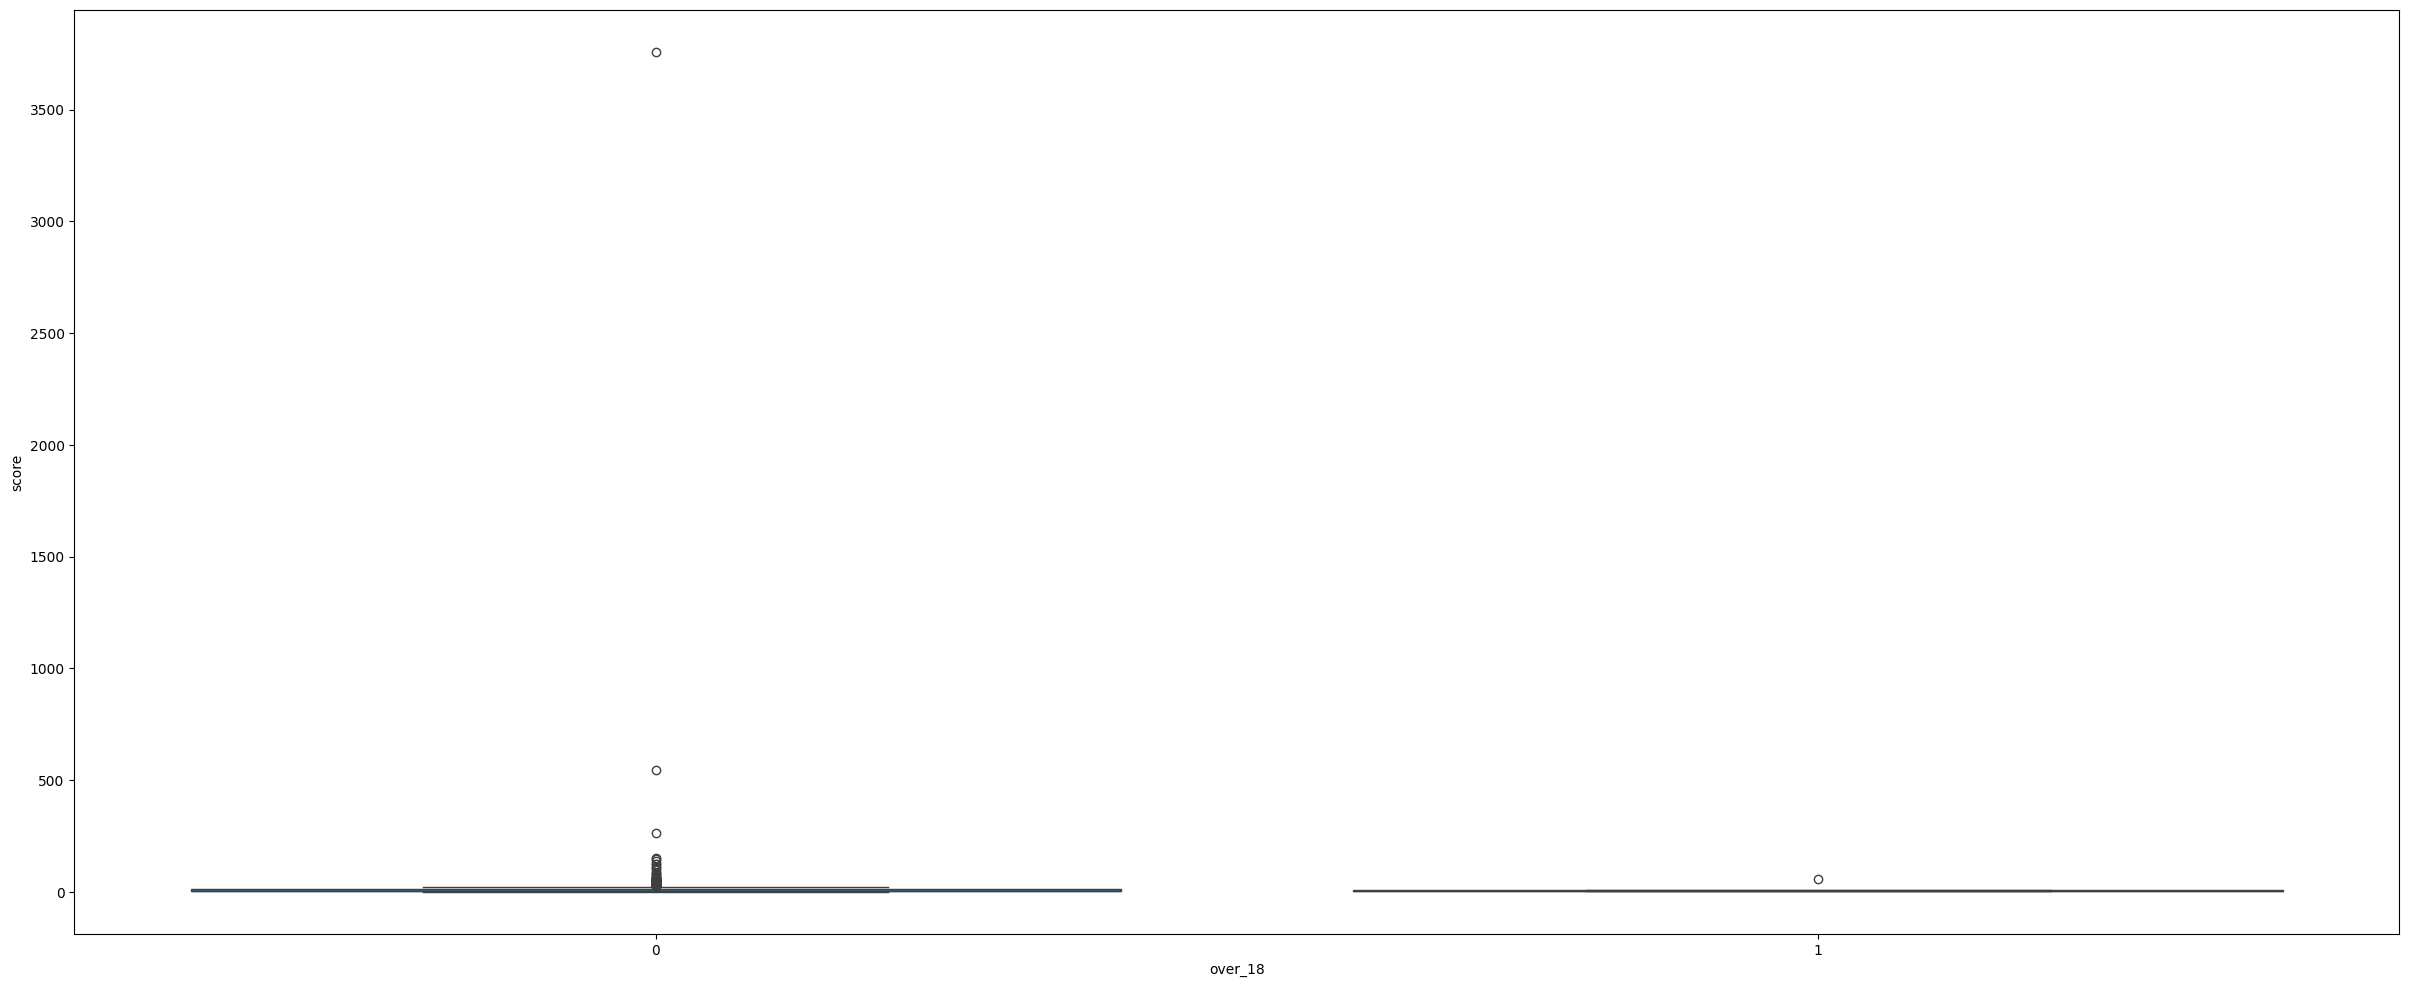

In [ ]:
boxplot(cleaned, 'score', 'over_18')

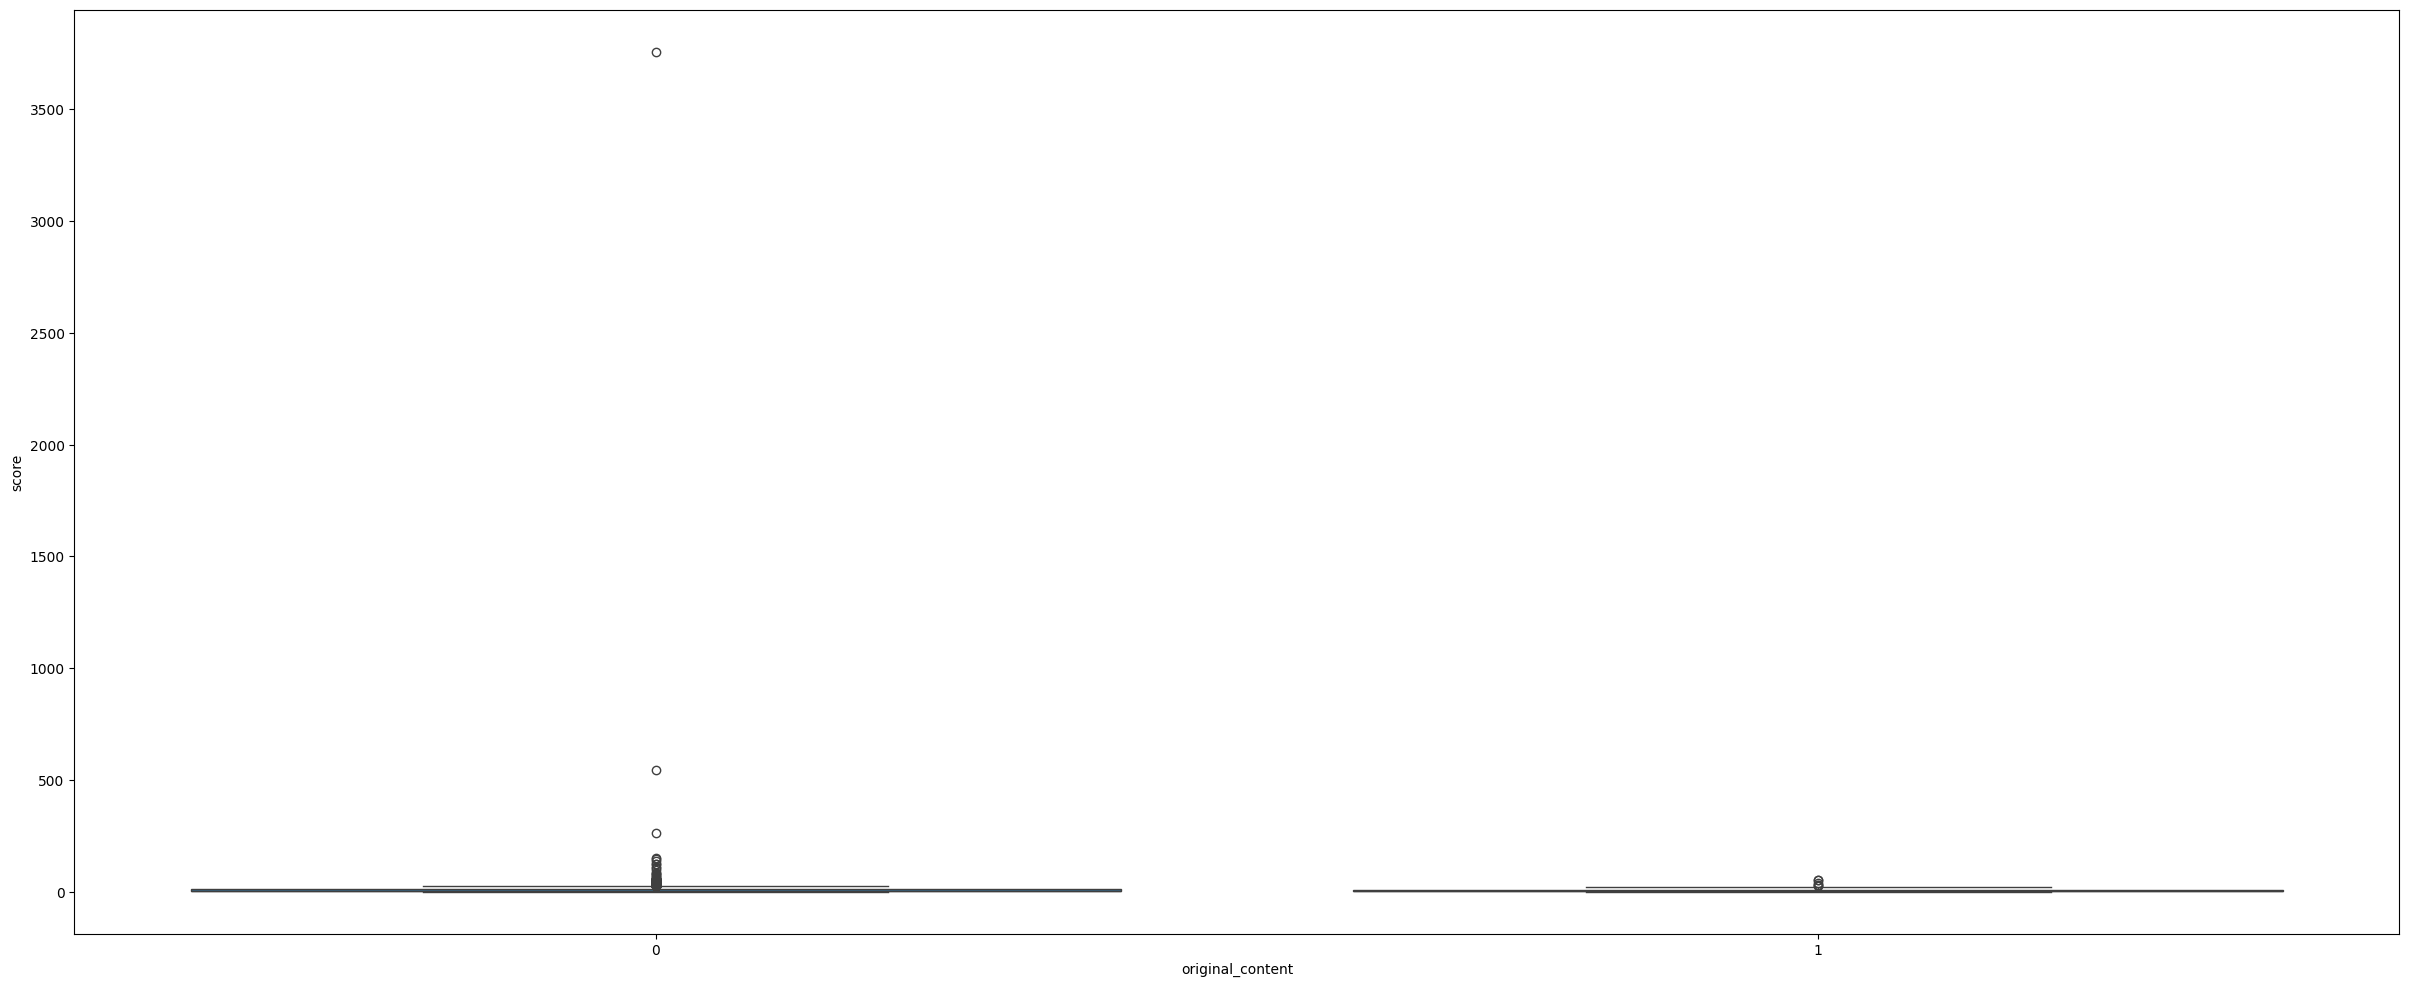

In [ ]:
boxplot(cleaned, 'score', 'original_content')

In [ ]:
cleaned['num_comments'].value_counts()

2      78
5      60
6      55
3      54
4      52
1      45
8      38
7      31
0      30
9      23
10     19
12     18
11     18
13     17
14     14
15     10
16      9
18      9
20      9
19      7
22      7
25      5
28      5
17      5
36      3
29      3
37      2
31      2
24      2
38      2
23      2
26      1
46      1
47      1
27      1
48      1
63      1
70      1
54      1
100     1
53      1
34      1
44      1
85      1
92      1
61      1
83      1
45      1
79      1
64      1
57      1
66      1
35      1
Name: num_comments, dtype: int64

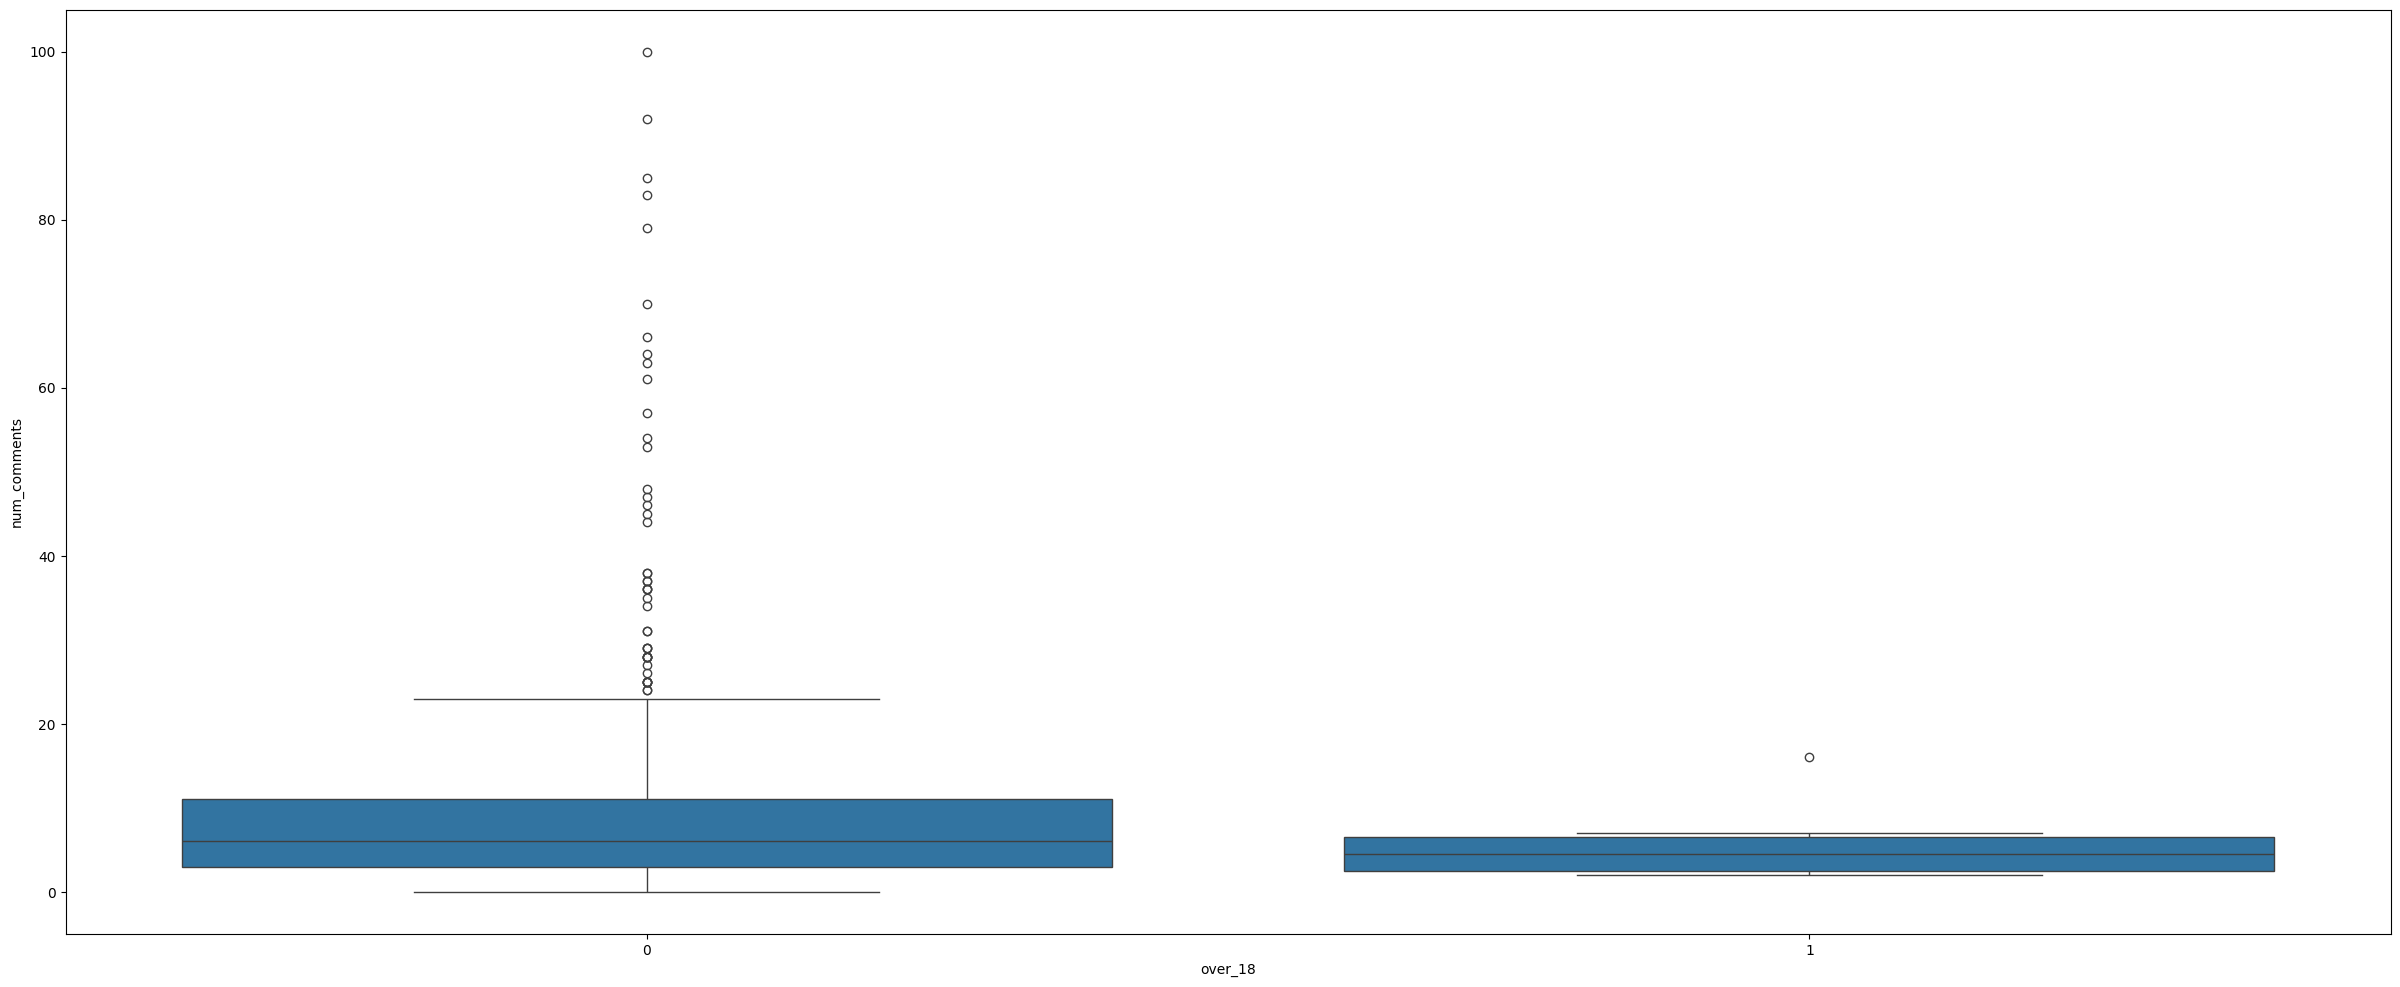

In [ ]:
boxplot(cleaned, 'num_comments', 'over_18')

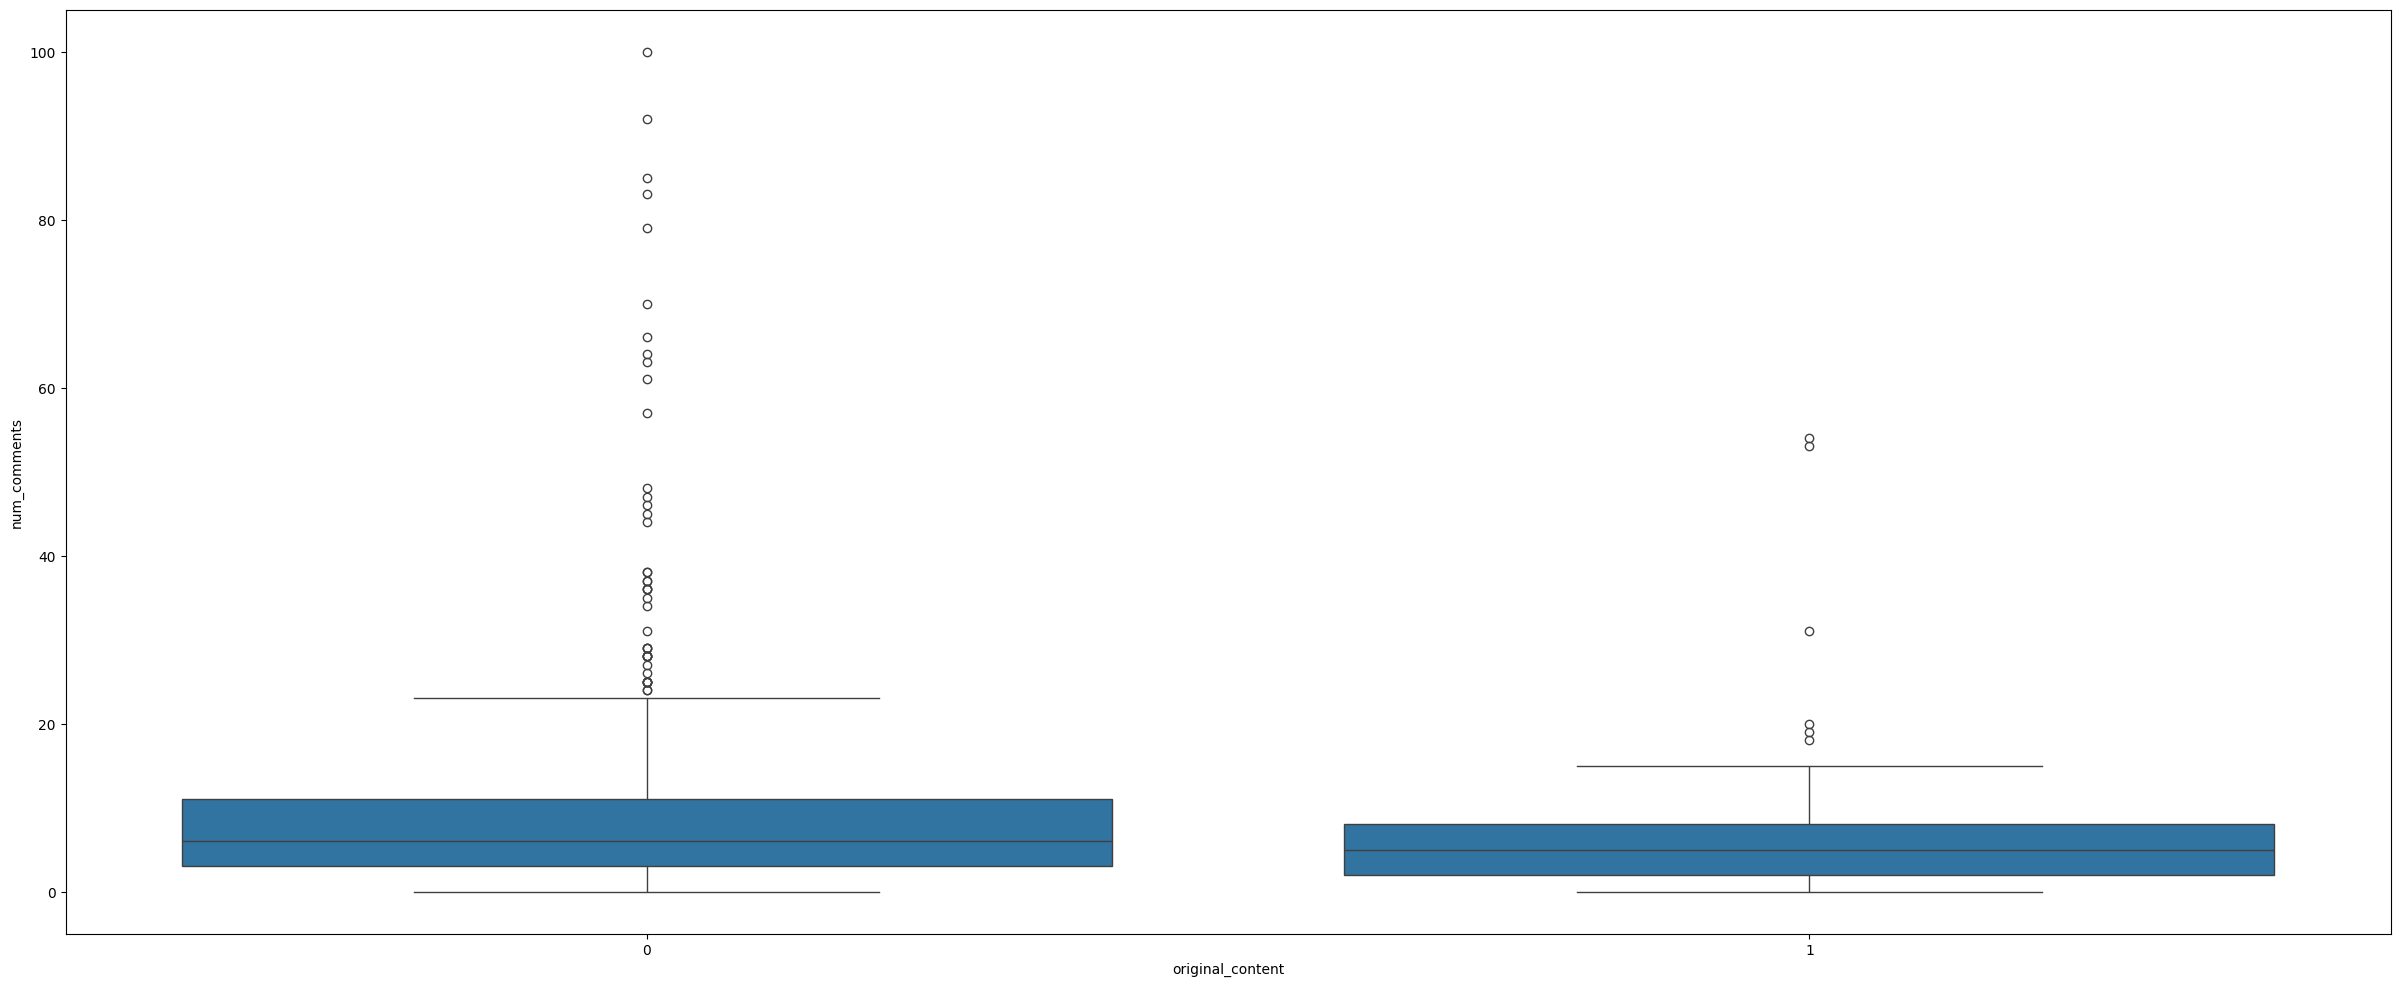

In [ ]:
boxplot(cleaned, 'num_comments', 'original_content')

## 5.2. Time Analysis<a id="5.2"></a>

In [ ]:
def countplot(data, by='year'):
    assert by in ['year', 'month', 'day']
    data_copy = data.copy()
    data_copy['year'] = data_copy['year'].astype(str)
    data_copy['month'] = data_copy['month'].astype(str)
    data_copy['day'] = data_copy['day'].astype(str)

    plt.figure(figsize=(30, 10))
    if by == 'year':
        stat = data_copy['year'].value_counts()
        sns.countplot(x=by, data=data_copy)
        plt.xlabel(by)
    elif by == 'month':
        data_copy['month'] = data_copy['year'] + '/' + data_copy['month']
        stat = data_copy['month'].value_counts()
        sns.countplot(x=by, data=data_copy)
        plt.xlabel(by)
        plt.xticks(rotation=45)
    elif by == 'day':
        data_copy['day'] = data_copy['year'] + '/' + data_copy['month'] + '/' + data_copy['day']
        stat = data_copy['day'].value_counts()
        sns.countplot(x=by, data=data_copy)

    plt.ylabel('count')
    plt.title('Count by Year/Month/Day Recent to Old')
    plt.show()

    return stat


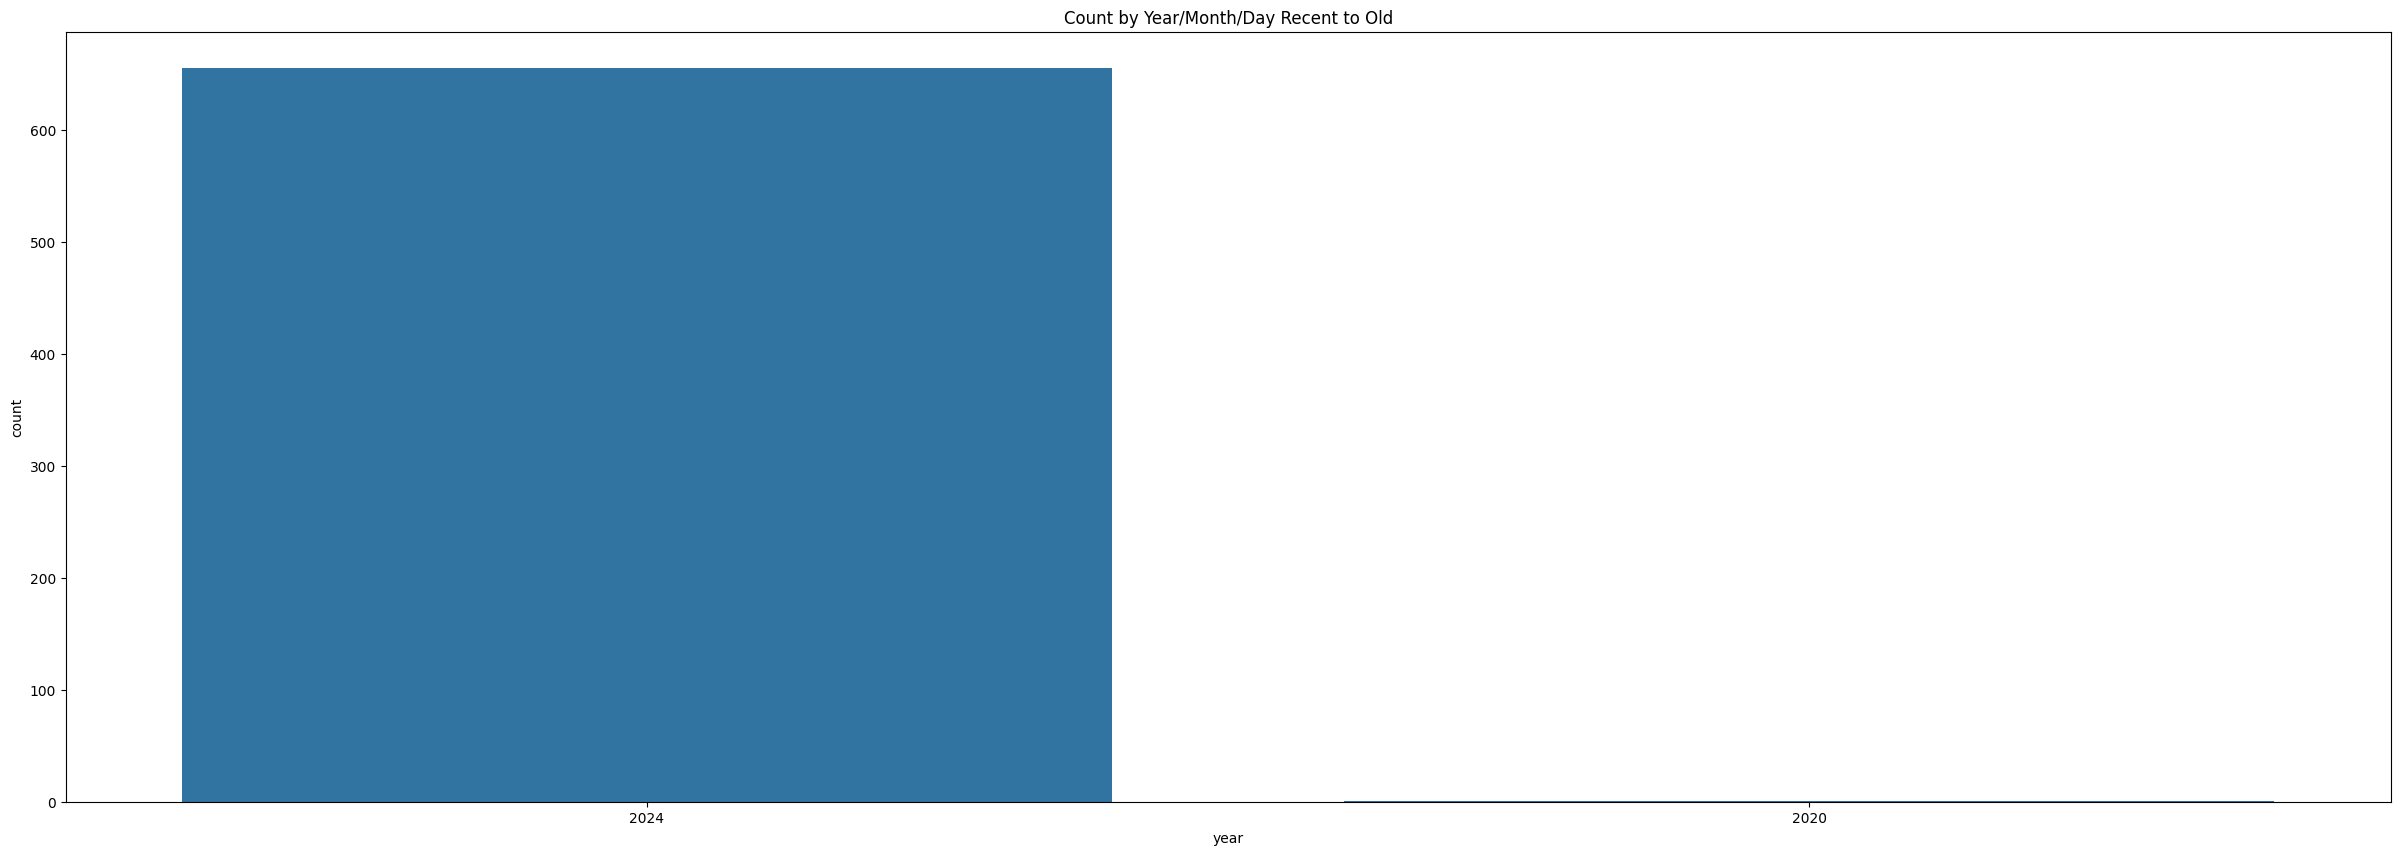

2024    655
2020      1
Name: year, dtype: int64

In [ ]:
countplot(cleaned, 'year')

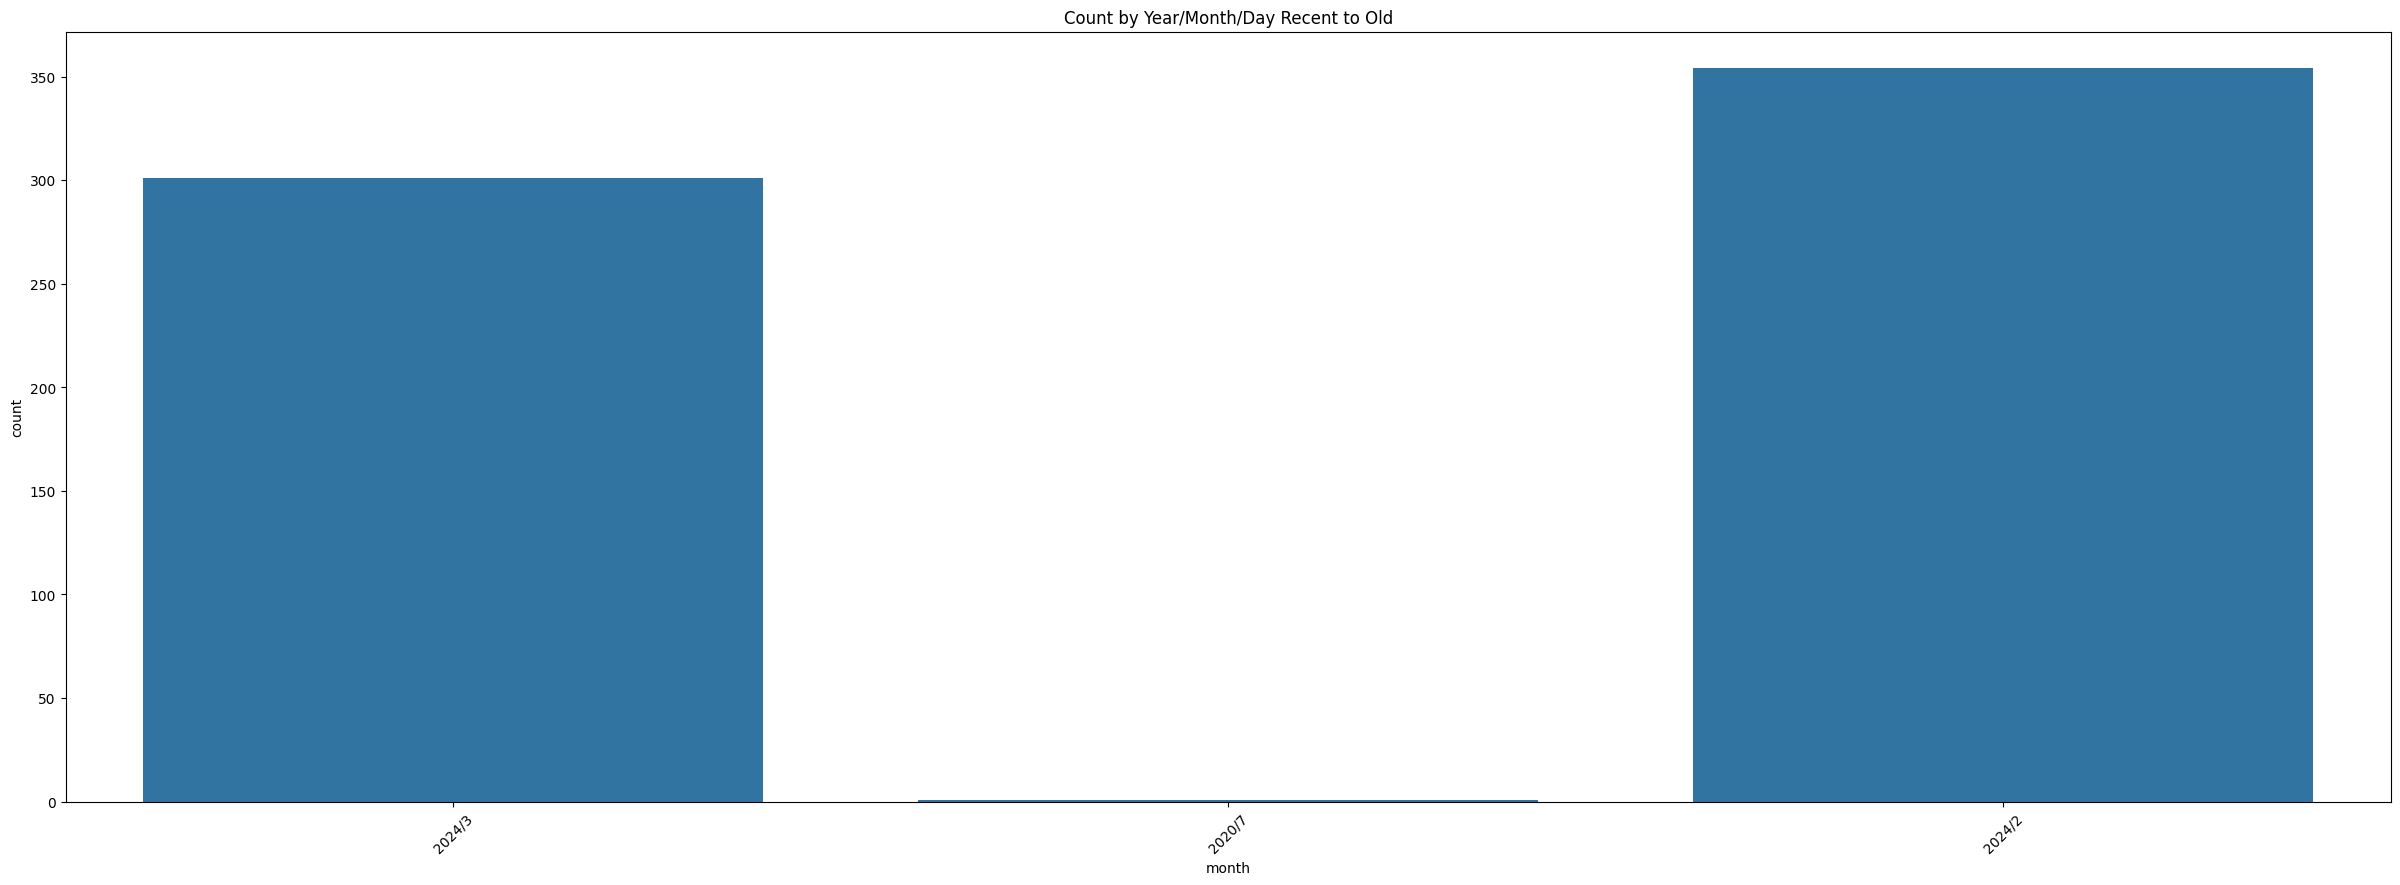

2024/2    354
2024/3    301
2020/7      1
Name: month, dtype: int64

In [ ]:
countplot(cleaned, 'month')

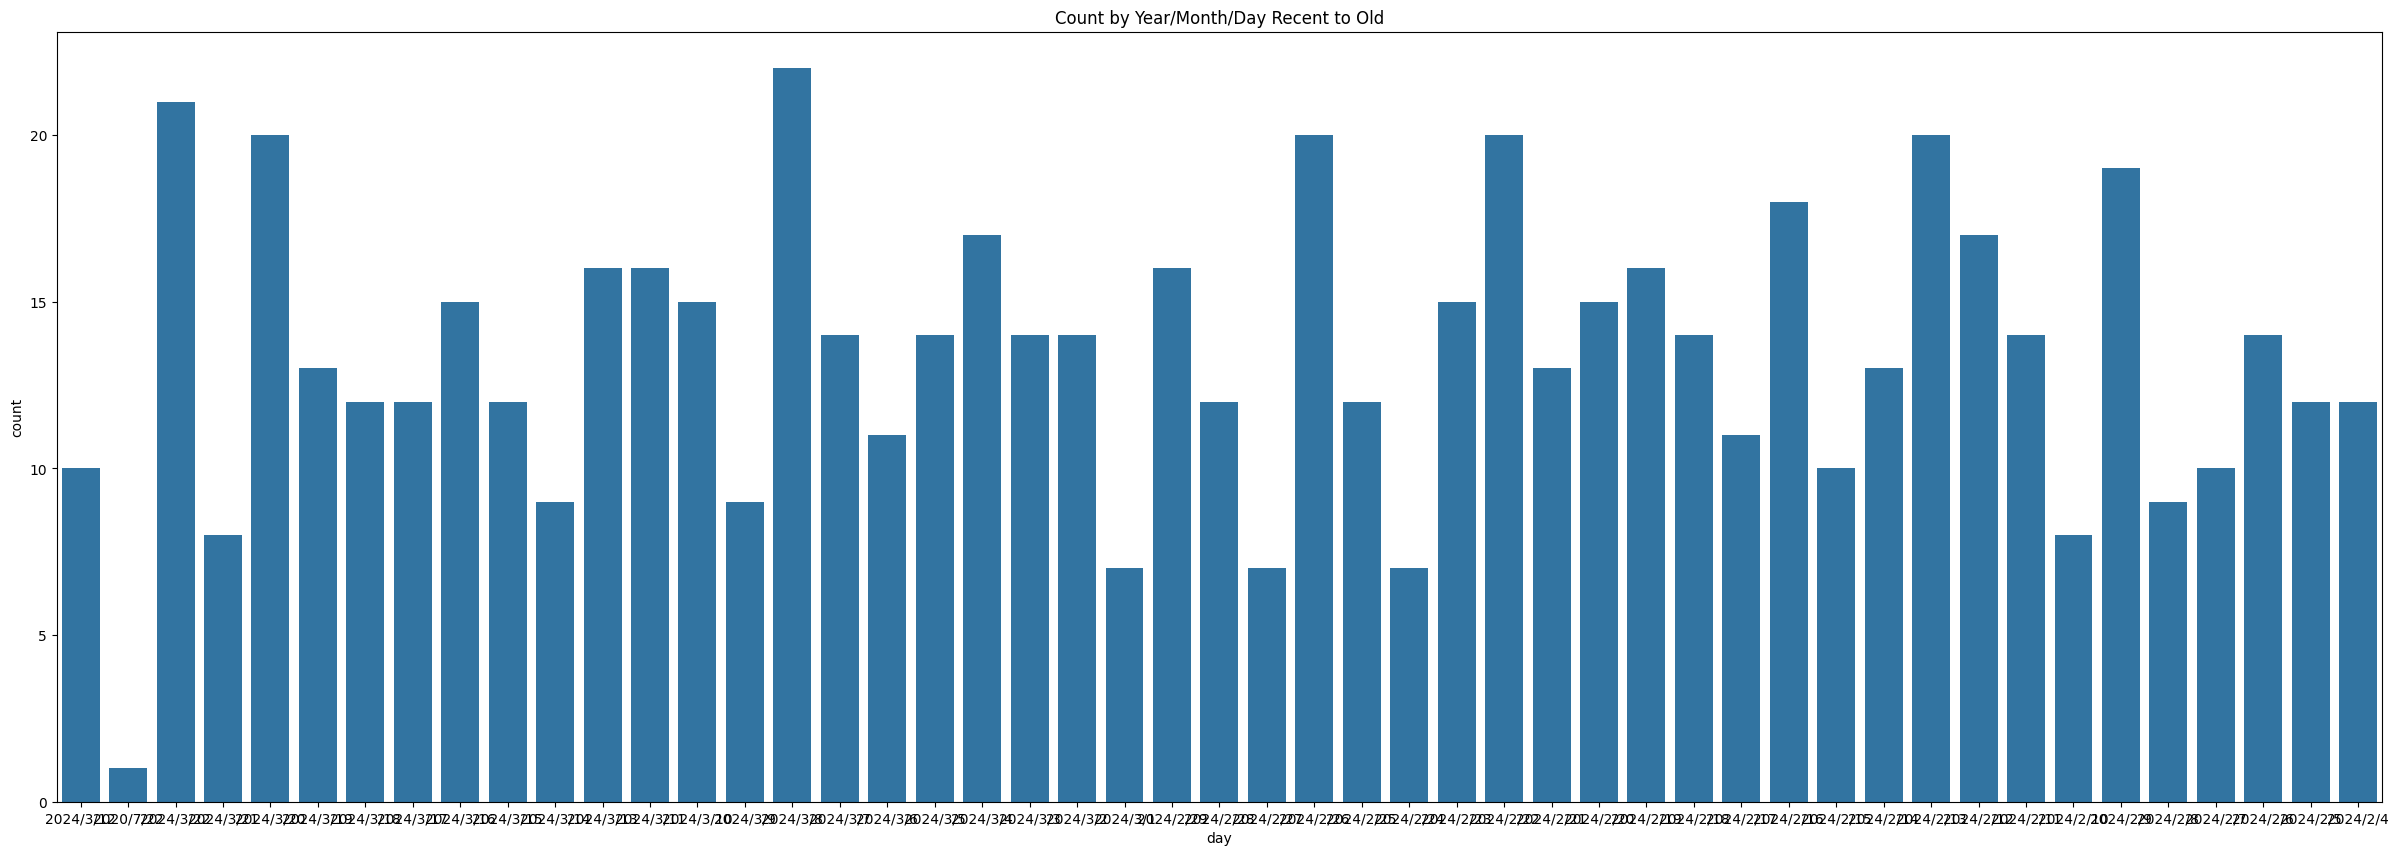

2024/3/8     22
2024/3/22    21
2024/2/22    20
2024/3/20    20
2024/2/26    20
2024/2/13    20
2024/2/9     19
2024/2/16    18
2024/2/12    17
2024/3/4     17
2024/2/19    16
2024/2/29    16
2024/3/13    16
2024/3/11    16
2024/2/20    15
2024/2/23    15
2024/3/10    15
2024/3/16    15
2024/3/7     14
2024/3/5     14
2024/3/3     14
2024/3/2     14
2024/2/11    14
2024/2/18    14
2024/2/6     14
2024/2/14    13
2024/3/19    13
2024/2/21    13
2024/2/5     12
2024/2/28    12
2024/2/4     12
2024/3/15    12
2024/3/18    12
2024/3/17    12
2024/2/25    12
2024/2/17    11
2024/3/6     11
2024/3/12    10
2024/2/7     10
2024/2/15    10
2024/2/8      9
2024/3/14     9
2024/3/9      9
2024/2/10     8
2024/3/21     8
2024/3/1      7
2024/2/27     7
2024/2/24     7
2020/7/22     1
Name: day, dtype: int64

In [ ]:
countplot(cleaned, 'day')

## 5.3. Wordcloud Text Analysis<a id="5.3"></a>

In [ ]:
!wget https://fonts.gstatic.com/s/notosanskr/v36/PbyxFmXiEBPT4ITbgNA5Cgms3VYcOA-vvnIzzrQyeLQ.ttf -O noto_sans_kr.ttf

--2024-03-24 05:03:39--  https://fonts.gstatic.com/s/notosanskr/v36/PbyxFmXiEBPT4ITbgNA5Cgms3VYcOA-vvnIzzrQyeLQ.ttf
Resolving fonts.gstatic.com (fonts.gstatic.com)... 74.125.132.94, 2607:f8b0:4001:c5c::5e
Connecting to fonts.gstatic.com (fonts.gstatic.com)|74.125.132.94|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6175296 (5.9M) [font/ttf]
Saving to: ‘noto_sans_kr.ttf’

noto_sans_kr.ttf    100%[===================>]   5.89M  --.-KB/s    in 0.07s   

2024-03-24 05:03:39 (83.6 MB/s) - ‘noto_sans_kr.ttf’ saved [6175296/6175296]



In [ ]:
def wordcloud(dataset, min_freq=1):
    bow = list()
    for title in tqdm(dataset['title_cleaned']):
        bow += word_tokenize(title)

    word_freq = dict()
    counter = Counter(bow)
    for word, freq in counter.items():
        if freq >= min_freq:
            word_freq[word] = freq

    wc = WordCloud(width=800, height=800, background_color='white',\
                   font_path='noto_sans_kr.ttf')
    wc = wc.generate_from_frequencies(word_freq)

    plt.figure(figsize=(12, 12))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.show()


    return counter, word_freq

100%|██████████| 656/656 [00:00<00:00, 5029.79it/s]


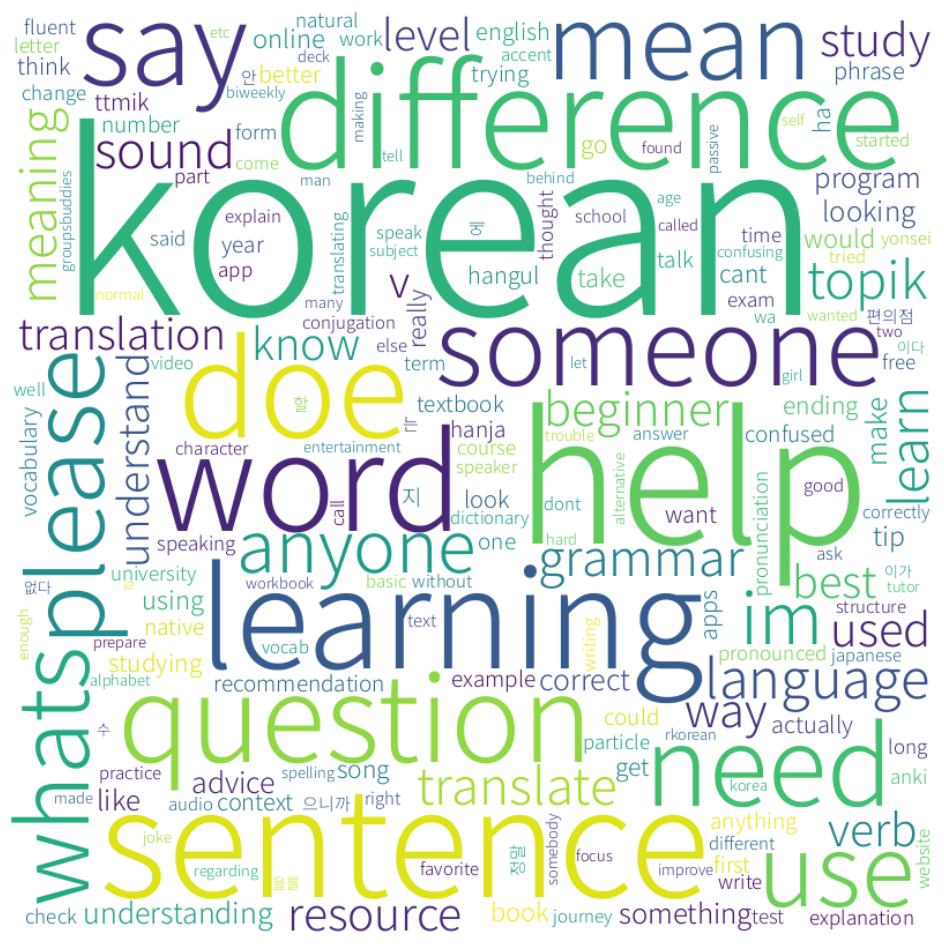

In [ ]:
counter, word_freq = wordcloud(cleaned)

In [ ]:
def wordcloud_by_date(dataset, year=None, month=None, day=None):
    dataset_cp = dataset.copy()

    if year:
        dataset_cp = dataset_cp[dataset_cp['year'] == year]
    if month:
        dataset_cp = dataset_cp[dataset_cp['month'] == month]
    if day:
        dataset_cp = dataset_cp[dataset_cp['day'] == day]

    return wordcloud(dataset_cp)

100%|██████████| 655/655 [00:00<00:00, 3314.04it/s]


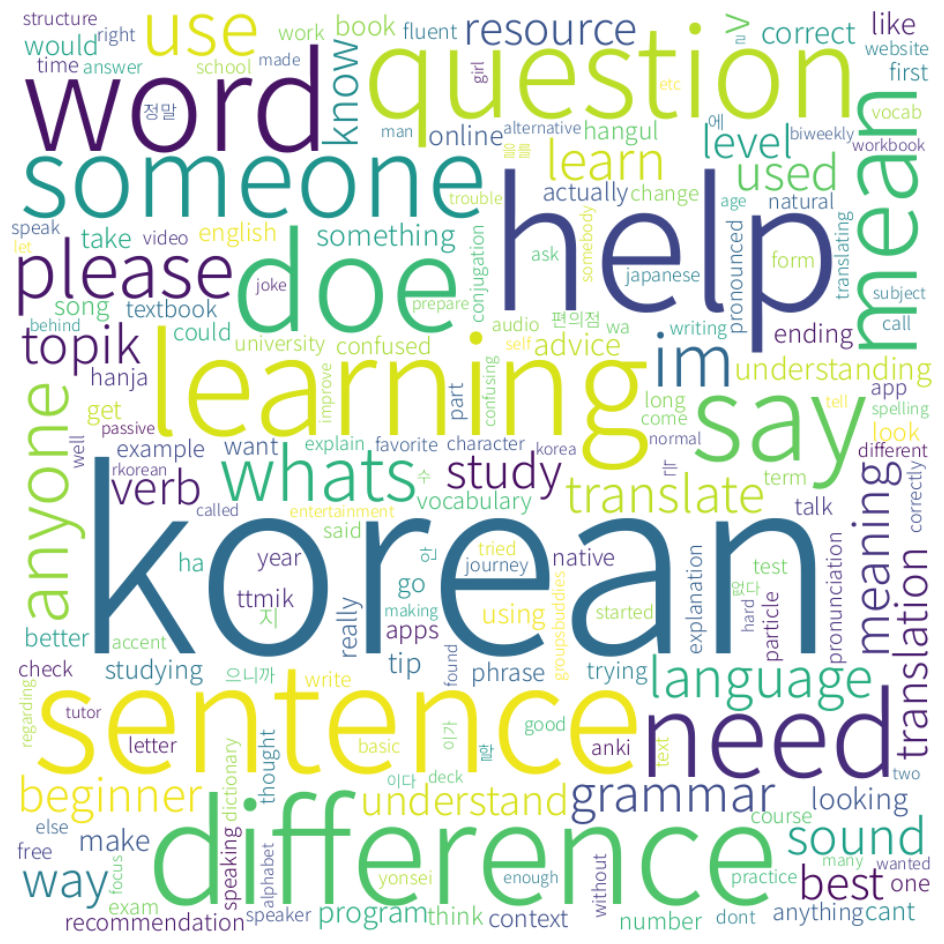

In [ ]:
counter_2024, word_freq_2024 = wordcloud_by_date(cleaned, year=2024)

100%|██████████| 7/7 [00:00<00:00, 4908.90it/s]


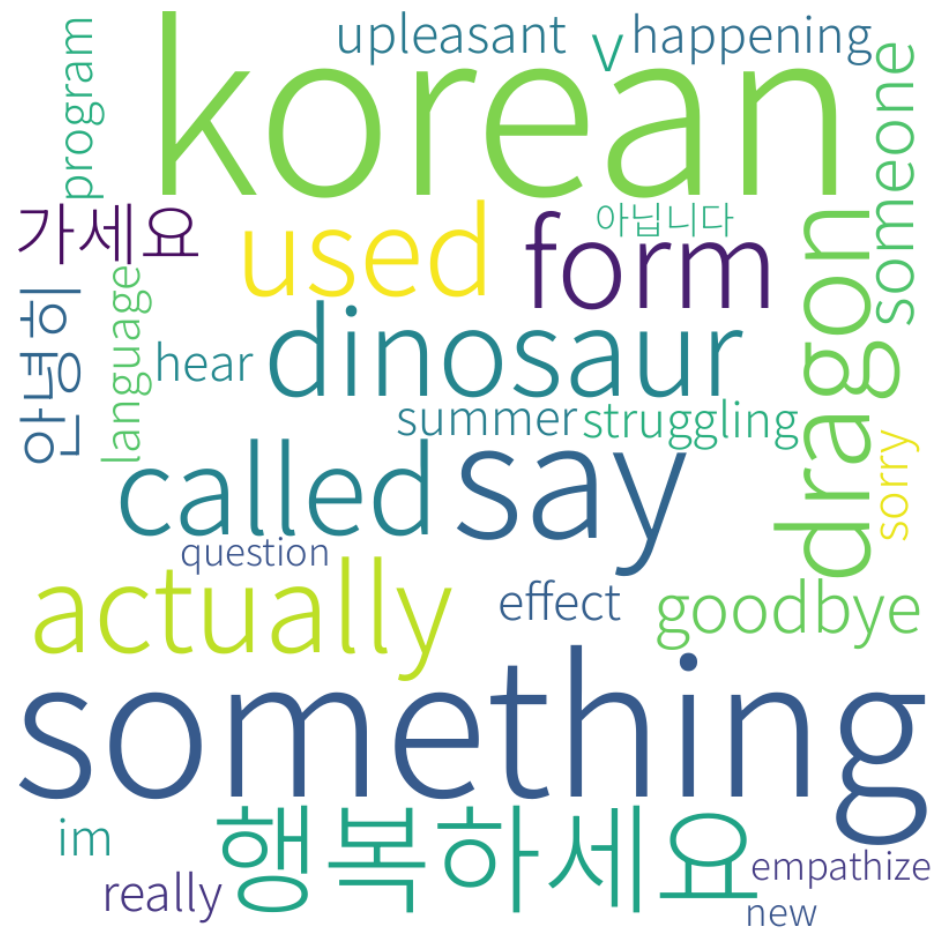

In [ ]:
counter_20240301, word_freq_20240301 = wordcloud_by_date(cleaned, year=2024, month=3, day=1)

100%|██████████| 14/14 [00:00<00:00, 7294.44it/s]


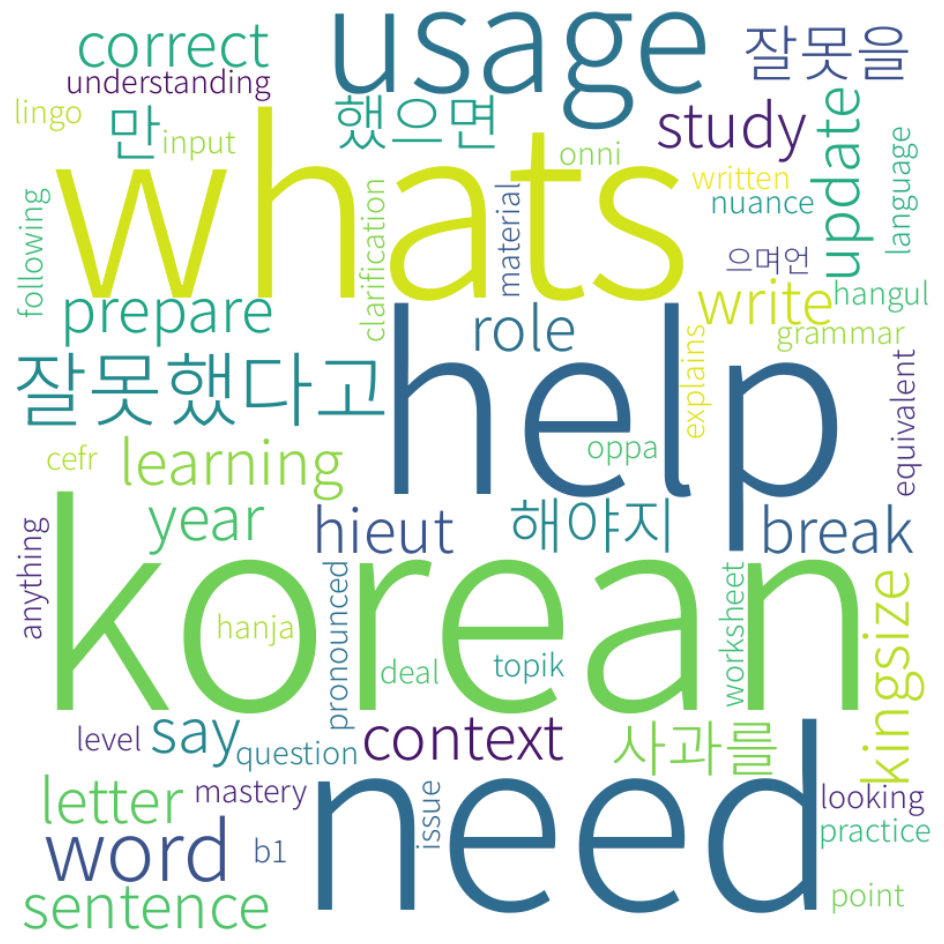

In [ ]:
counter_20240302, word_freq_20240302 = wordcloud_by_date(cleaned, year=2024, month=3, day=2)

100%|██████████| 354/354 [00:00<00:00, 9820.58it/s]


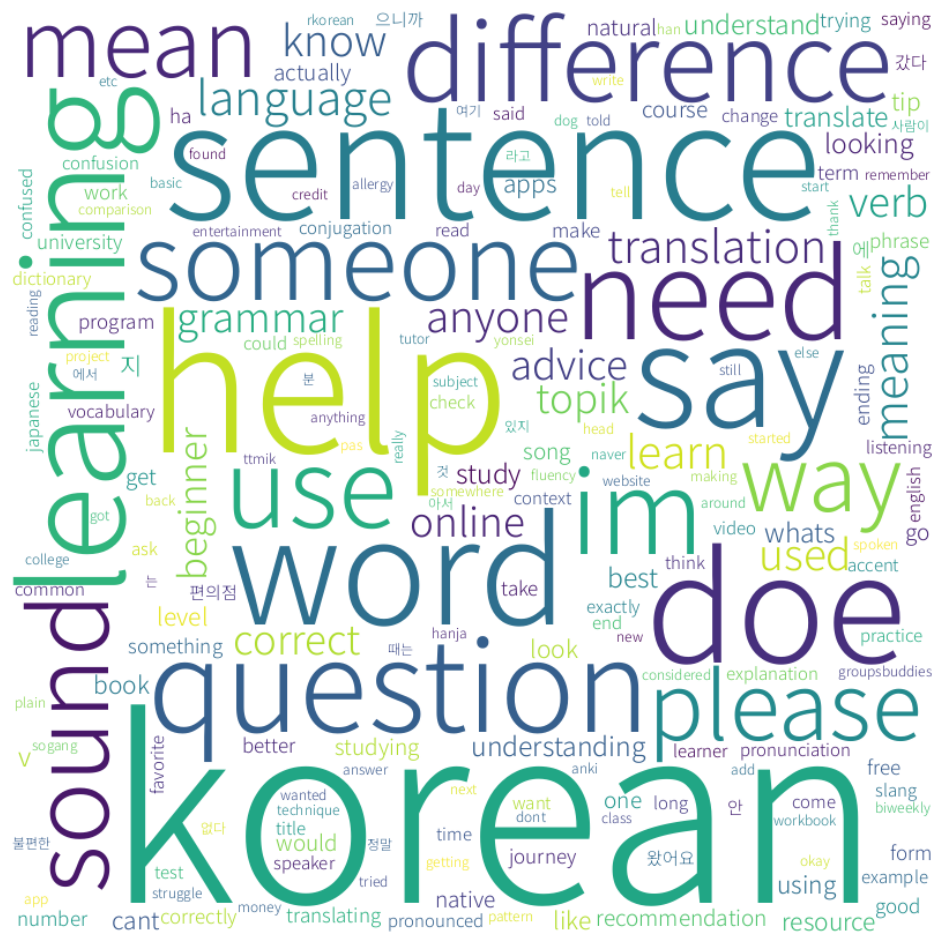

In [ ]:
counter_202402, word_freq_202402 = wordcloud_by_date(cleaned, year=2024, month=2)

100%|██████████| 354/354 [00:00<00:00, 9697.94it/s]


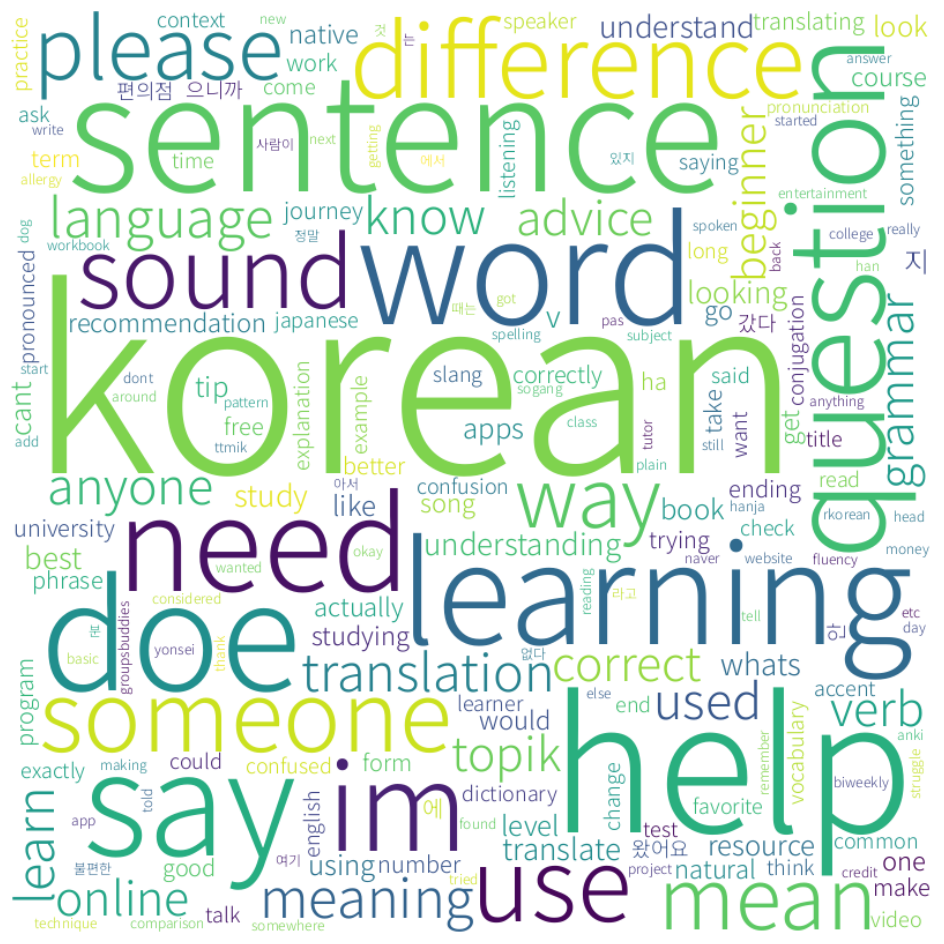

In [ ]:
counter_04, word_freq_04 = wordcloud_by_date(cleaned, month=2)